In [22]:
# Project 5: E-Commerce Data Insights
# Problem Statement: E-commerce platforms need to know what products and users drive revenue.

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv("E:/AICTE Intern Tasks/RISE/Datasets/5_E-Commerce.csv")

In [25]:
df.head()

,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,City
0,1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-10,Albuquerque
1,2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-28,Queens
2,3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-20,Austin
3,4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,2023-12-05,Dallas
4,5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,2023-08-10,Tucson


In [26]:
df.columns

Index(['ProductID', 'ProductName', 'Category', 'Price', 'Rating', 'NumReviews',
       'StockQuantity', 'Discount', 'Sales', 'DateAdded', 'City'],
      dtype='object')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ProductID      1000 non-null   int64  
 1   ProductName    1000 non-null   object 
 2   Category       1000 non-null   object 
 3   Price          1000 non-null   float64
 4   Rating         1000 non-null   float64
 5   NumReviews     1000 non-null   int64  
 6   StockQuantity  1000 non-null   int64  
 7   Discount       1000 non-null   float64
 8   Sales          1000 non-null   int64  
 9   DateAdded      1000 non-null   object 
 10  City           1000 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 86.1+ KB


In [28]:
df.describe()

,ProductID,Price,Rating,NumReviews,StockQuantity,Discount,Sales
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,253.77551,3.025600,2498.753000,495.395000,0.251640,1011.037000
std,288.819436,141.40362,1.151004,1463.241871,292.799253,0.146455,582.113466
min,1.000000,10.11000,1.000000,3.000000,0.000000,0.000000,0.000000
25%,250.750000,133.09250,2.100000,1201.750000,241.750000,0.130000,502.000000
50%,500.500000,251.31000,3.100000,2476.000000,505.000000,0.250000,998.000000
75%,750.250000,375.82750,4.000000,3797.500000,743.500000,0.380000,1540.000000
max,1000.000000,499.74000,5.000000,4994.000000,993.000000,0.500000,1997.000000


In [29]:
df.shape

(1000, 11)

In [30]:
# check for missing values

df.isnull().sum()

ProductID        0
ProductName      0
Category         0
Price            0
Rating           0
NumReviews       0
StockQuantity    0
Discount         0
Sales            0
DateAdded        0
City             0
dtype: int64

In [31]:
# Convert 'DateAdded' to datetime
df['DateAdded'] = pd.to_datetime(df['DateAdded'], format='%Y-%m-%d')

In [32]:
# Add Month-Year column
df['MonthYear'] = df['DateAdded'].dt.to_period('M')

In [33]:
# Remove any duplicates or nulls
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [34]:
df.head()

,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,City,MonthYear
0,1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-10,Albuquerque,2023-11
1,2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-28,Queens,2023-09
2,3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-20,Austin,2023-10
3,4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,2023-12-05,Dallas,2023-12
4,5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,2023-08-10,Tucson,2023-08


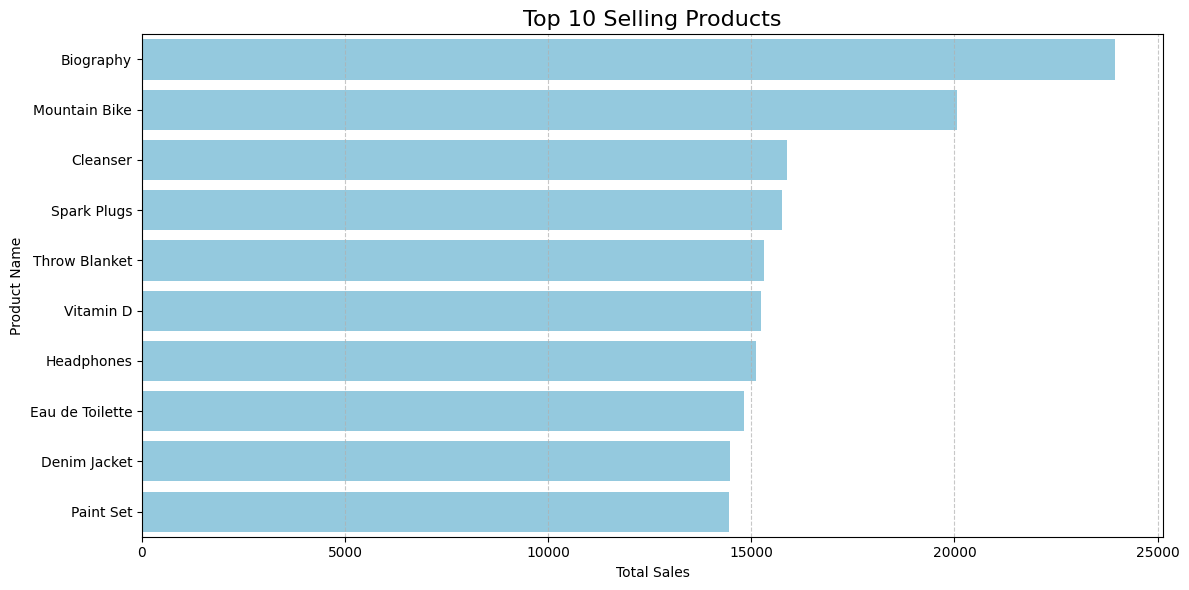

In [35]:
# Top 10 Selling Products 
top_selling = df.groupby('ProductName')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
# sns.barplot(x=top_selling.values, y=top_selling.index, hue=top_selling.index, palette='viridis', legend=False)
sns.barplot(x=top_selling.values, y=top_selling.index, color='skyblue')
plt.title('Top 10 Selling Products', fontsize=16)
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

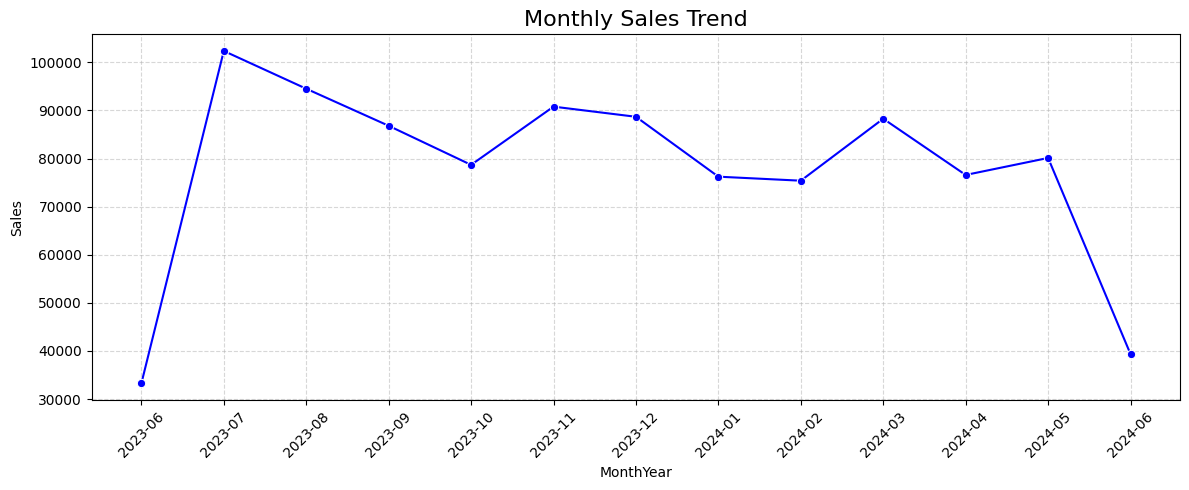

In [36]:
# Monthly Sales Trend 
monthly_sales = df.groupby('MonthYear')['Sales'].sum().reset_index()
monthly_sales['MonthYear'] = monthly_sales['MonthYear'].astype(str)

plt.figure(figsize=(12, 5))
sns.lineplot(x='MonthYear', y='Sales', data=monthly_sales, marker='o', color='blue')
plt.title("Monthly Sales Trend", fontsize=16)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

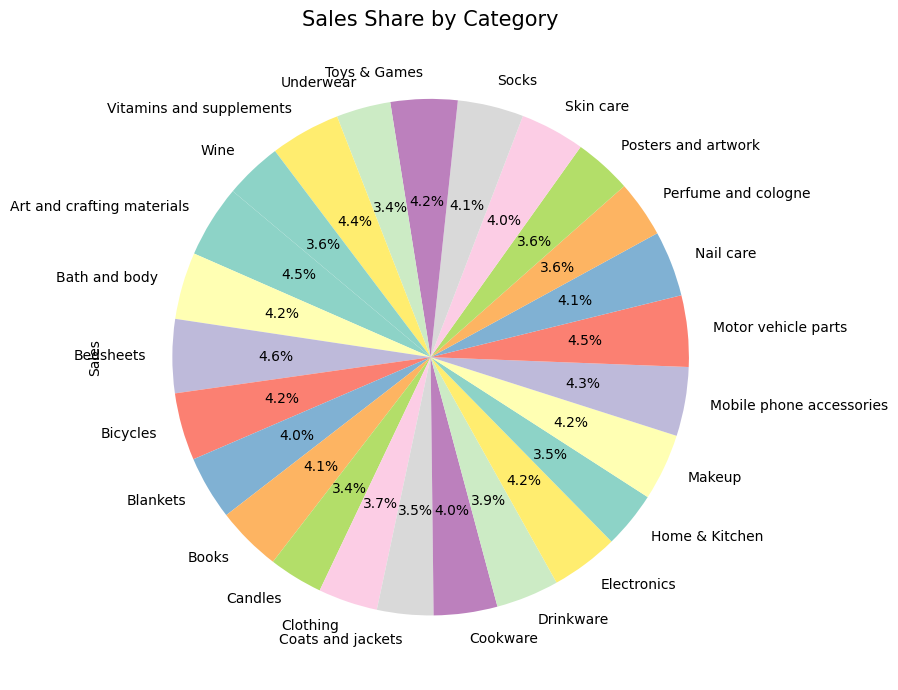

In [37]:
# Category-wise Sales Share
category_sales = df.groupby('Category')['Sales'].sum()
plt.figure(figsize=(10, 7))
category_sales.plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'))
plt.title("Sales Share by Category", fontsize=15)
plt.tight_layout()
plt.show()

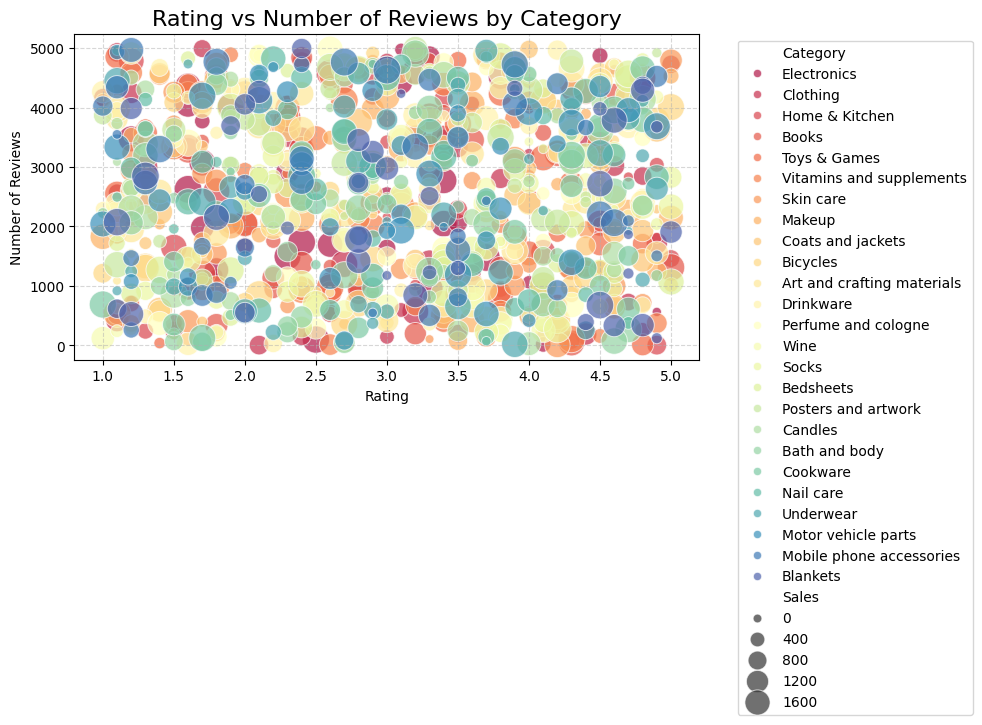

In [38]:
# Rating vs Reviews 
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Rating', y='NumReviews', hue='Category', size='Sales', palette='Spectral', sizes=(40, 400), alpha=0.7)
plt.title("Rating vs Number of Reviews by Category", fontsize=16)
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

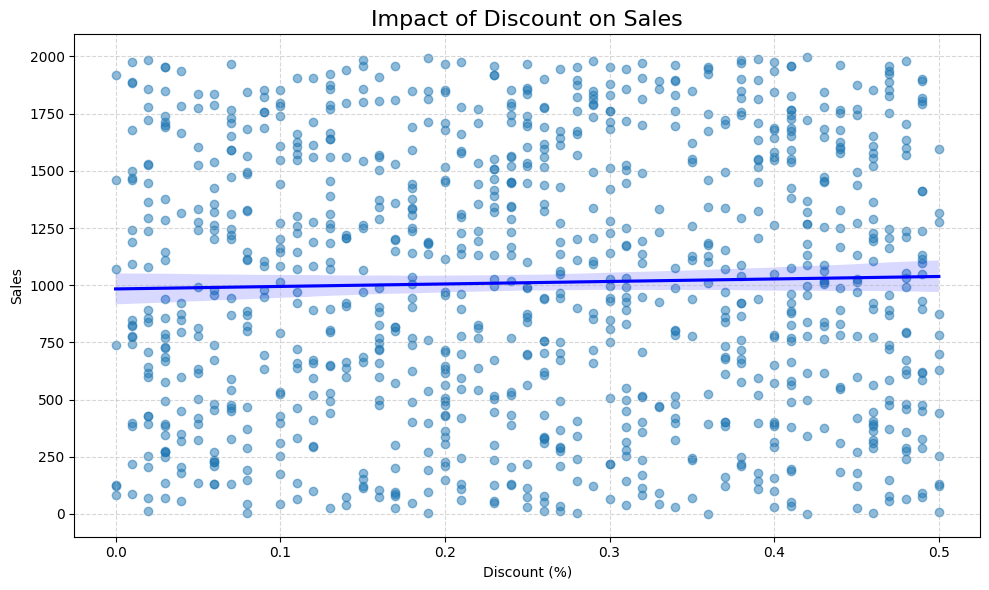

<Figure size 640x480 with 0 Axes>

In [39]:
# Discount Impact on Sales 
plt.figure(figsize=(10, 6))
sns.regplot(x='Discount', y='Sales', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'blue'})
plt.title("Impact of Discount on Sales", fontsize=16)
plt.xlabel("Discount (%)")
plt.ylabel("Sales")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()


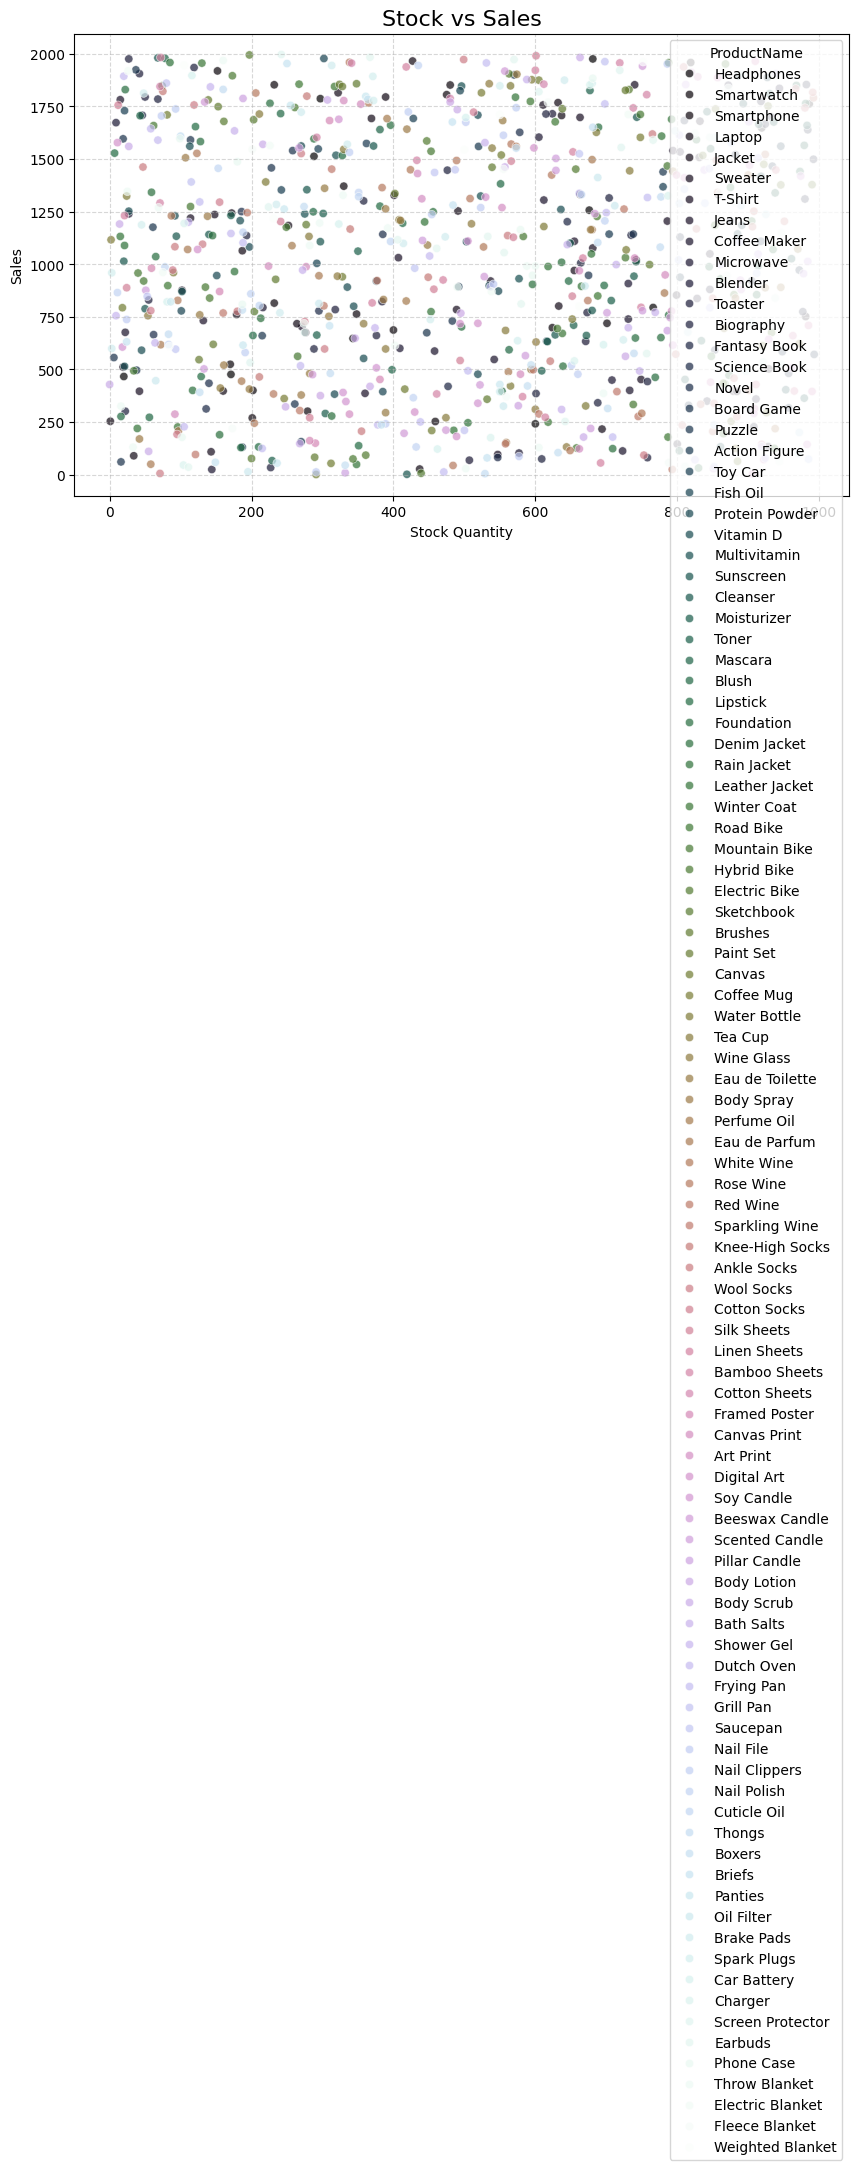

In [40]:
# Stock Availability vs Sales 
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='StockQuantity', y='Sales', hue='ProductName', palette='cubehelix', alpha=0.7)
plt.title("Stock vs Sales", fontsize=16)
plt.xlabel("Stock Quantity")
plt.ylabel("Sales")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [41]:
df.to_csv('E:/AICTE Intern Tasks/RISE/Datasets/5_Ecommerce_Cleaned.csv', index=False)

In [42]:
# Conclusion

'''

The E-Commerce Product Insights Dashboard provides a comprehensive and interactive overview of product performance and 
customer behavior based on historical sales data. By integrating filters and visualizations, the dashboard enables users to:
1. Identify top-performing products and cities generating the highest revenue.
2. Understand monthly sales trends for better demand forecasting.
3. Analyze category-wise sales distribution to spot popular product categories.
4. Evaluate the impact of discounts on sales, which helps optimize pricing strategies.
5. Visualize the relationship between product ratings and reviews, offering insight into customer satisfaction and engagement.

'''


'\n\nThe E-Commerce Product Insights Dashboard provides a comprehensive and interactive overview of product performance and \ncustomer behavior based on historical sales data. By integrating filters and visualizations, the dashboard enables users to:\n1. Identify top-performing products and cities generating the highest revenue.\n2. Understand monthly sales trends for better demand forecasting.\n3. Analyze category-wise sales distribution to spot popular product categories.\n4. Evaluate the impact of discounts on sales, which helps optimize pricing strategies.\n5. Visualize the relationship between product ratings and reviews, offering insight into customer satisfaction and engagement.\n\n'